In [13]:
import pandas as pd
import numpy as np
from time import sleep

In [25]:
colomns=range(30)
learned_features=pd.read_csv('compressed_data.csv',names=colomns)

In [26]:
learned_features=learned_features.values
learned_features.shape

(890, 30)

In [27]:
a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
x.shape

39963.59


(890, 250)

In [28]:
siny=[]
cosy=[]
k = np.arange(250)
Fs=250
for f in range(1,31):
    siny.append(np.sin(2 * np.pi * f * k / Fs))
    cosy.append(np.cos(2 * np.pi * f * k / Fs))

In [29]:
siny=np.array(siny)
cosy=np.array(cosy)

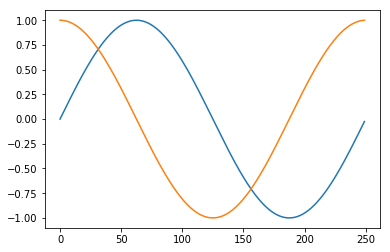

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(250),siny[0],label=1)
plt.plot(range(250),cosy[0],label=2)

In [31]:
sin=[]
cos=[]
for i in range(890):
    sin.append(np.sum(x[i]*siny,axis=1))
    cos.append(np.sum(x[i]*cosy,axis=1))
sin=np.array(sin)
cos=np.array(cos)
sin=pow(sin,2)
cos=pow(cos,2)
fft=np.sqrt(sin+cos)
fft=fft.reshape(890,10,3)
fft=np.sum(fft,axis=2)
fft.shape

(890, 10)

In [32]:
from scipy.stats import linregress
print(learned_features[0].shape)
linregress(learned_features.T[0], fft.T[0])

(30,)


LinregressResult(slope=-2.0912460038790015, intercept=23102.147357088987, rvalue=-0.05537426228014333, pvalue=0.09875528584959178, stderr=1.2653883284264524)

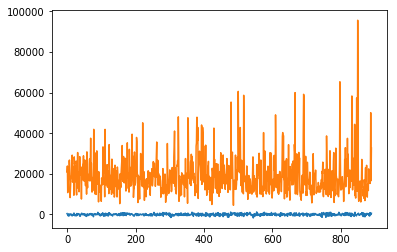

In [33]:
plt.plot(range(890),learned_features.T[1],label=1)
plt.plot(range(890),fft.T[1],label=1)

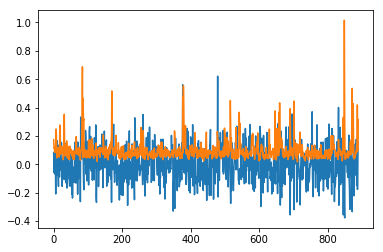

In [34]:
x1=learned_features.T[0]
x2=fft.T[0]
x1=x1/(max(x1)-min(x1))
x2=x2/(max(x2)-min(x2))
plt.plot(range(890),x1,label=1)
plt.plot(range(890),x2,label=1)

In [36]:
k=(np.max(learned_features.T,axis=1)-np.min(learned_features.T,axis=1))
print(k)
learned_features=learned_features/(k.reshape(1,30))
k=(np.max(fft.T,axis=1)-np.min(fft.T,axis=1))
print(k)
fft=fft/(k.reshape(1,10))

[3652.34204102 2961.12402344 3511.76416016 3356.20422363 4236.97583008
 2416.11730957 3752.41577148 3388.56237793 3217.87011719 7200.27929688
 2976.25012207 4107.12280273 2912.27587891 4115.72692871 3662.59460449
 2978.58544922 3267.39233398 4604.73059082 3354.99951172 2903.89599609
 4392.57983398 5181.06005859 3231.27941895 3304.87890625 4531.67944336
 3514.16564941 3131.63562012 5422.98950195 4836.89892578 2841.74328613]
[236607.01675437  91099.6201257   79346.18730326  67134.75547166
  24961.10545191  24803.20944308  19449.0324403   15540.28028503
  13337.93677451  16246.53454937]


In [13]:
#%matplotlib widget
#upto=100
#plt.plot(range(upto),fft.T[0][0:upto],label=1)
#plt.plot(range(upto),learned_features.T[0][0:upto],label=1)

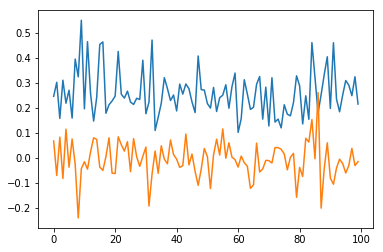

In [87]:
upto=100
for i in [9]:
    for j in [0]:
        #plt.subplot(2,2,j+1)
        plt.plot(range(upto),fft.T[i][0:upto],label=1)
        plt.plot(range(upto),learned_features.T[j][0:upto],label=1)
        

In [ ]:
#np.corrcoef(fft[0],learned_features[0])[0][1]

In [47]:
#fft=fft.T
#learned_features=learned_features.T
for i in range(1,10):
    for j in range(30):
        if (np.corrcoef(fft.T[i],learned_features.T[j])[0][1]>0.1 or np.corrcoef(fft.T[i],learned_features.T[j])[0][1]<-0.1):
            print(np.corrcoef(fft.T[i],learned_features.T[j])[0][1],end=' , ')
    print()
    print()


0.1407005893032656 , 0.12055417479418144 , 









-0.11060335606712485 , 









In [44]:
print(np.corrcoef(fft.T,learned_features.T)[0])

[ 1.          0.48766142  0.03753119  0.02631539  0.09919126  0.05942721
  0.09737546  0.03521136  0.16894919  0.18119627 -0.05537426 -0.01297857
  0.15484014  0.0528163  -0.00823031 -0.03321025  0.04082698 -0.08668453
  0.05387004  0.12898138  0.01479702 -0.0625834   0.05526852 -0.2159111
  0.04699635  0.01229053  0.02983766  0.03701528 -0.04686886 -0.05226737
  0.05133079 -0.01216649 -0.03075417 -0.03086771  0.10184328 -0.01214795
  0.02109969  0.06064782  0.00649006  0.05697212]


In [ ]:
a=x[0]
fourier = np.fft.fft(a)
n = a.size
freq = np.fft.fftfreq(n, d=1/250)

In [ ]:
#print(a)
#print(fourier)

In [ ]:
freq = np.fft.fftfreq(250, d=1/250)
#freq

In [ ]:
t=range(250)
sine=[]
for i in range(250):
    sine.append(np.sin(2*180*1*i/250))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(250),sine,label=1)
#plt.plot(range(250),fourier,label=2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 250
f = 5
sample = 250
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()